### Pandas Group by and Concatenate Tutorial

In [71]:
import pandas as pd
df = pd.read_excel("Data_group.xlsx")
df

,day,city,temperature,windspeed,event
0,2017-01-01,new york,32,6,Rain
1,2017-02-01,new york,36,7,Sunny
2,2017-03-01,new york,28,12,Snow
3,2017-04-01,new york,33,7,Sunny
4,2017-01-01,mumbai,90,5,Sunny
5,2017-02-01,mumbai,85,12,Fog
6,2017-03-01,mumbai,87,15,Fog
7,2017-04-01,mumbai,92,5,Rain
8,2017-01-01,paris,45,20,Sunny
9,2017-02-01,paris,50,13,Cloudy


In [72]:
g = df.groupby("city")
g.get_group("paris")

,day,city,temperature,windspeed,event
8,2017-01-01,paris,45,20,Sunny
9,2017-02-01,paris,50,13,Cloudy
10,2017-03-01,paris,54,8,Cloudy
11,2017-04-01,paris,42,10,Cloudy


In [73]:
h = df.groupby("day")
h.get_group("2017-01-01")

,day,city,temperature,windspeed,event
0,2017-01-01,new york,32,6,Rain
4,2017-01-01,mumbai,90,5,Sunny
8,2017-01-01,paris,45,20,Sunny


In [74]:
for city, data in g:
    print("city :", city)
    print("\n")
    print("data :",data)

city : mumbai


data :          day    city  temperature  windspeed  event
4 2017-01-01  mumbai           90          5  Sunny
5 2017-02-01  mumbai           85         12    Fog
6 2017-03-01  mumbai           87         15    Fog
7 2017-04-01  mumbai           92          5   Rain
city : new york


data :          day      city  temperature  windspeed  event
0 2017-01-01  new york           32          6   Rain
1 2017-02-01  new york           36          7  Sunny
2 2017-03-01  new york           28         12   Snow
3 2017-04-01  new york           33          7  Sunny
city : paris


data :           day   city  temperature  windspeed   event
8  2017-01-01  paris           45         20   Sunny
9  2017-02-01  paris           50         13  Cloudy
10 2017-03-01  paris           54          8  Cloudy
11 2017-04-01  paris           42         10  Cloudy


### This is similar to SQL

SELECT * from weather_data GROUP BY city


In [75]:
g.get_group("mumbai")

,day,city,temperature,windspeed,event
4,2017-01-01,mumbai,90,5,Sunny
5,2017-02-01,mumbai,85,12,Fog
6,2017-03-01,mumbai,87,15,Fog
7,2017-04-01,mumbai,92,5,Rain


In [76]:
g.max()

,day,temperature,windspeed,event
city,,,,
mumbai,2017-04-01,92,15,Sunny
new york,2017-04-01,36,12,Sunny
paris,2017-04-01,54,20,Sunny


In [77]:
g.mean()

,temperature,windspeed
city,,
mumbai,88.50,9.25
new york,32.25,8.00
paris,47.75,12.75


In [78]:
g.min()

,day,temperature,windspeed,event
city,,,,
mumbai,2017-01-01,85,5,Fog
new york,2017-01-01,28,6,Rain
paris,2017-01-01,42,8,Cloudy


In [79]:
g.describe()

temperature                                                   \
               count   mean       std   min    25%   50%    75%   max   
city                                                                    
mumbai           4.0  88.50  3.109126  85.0  86.50  88.5  90.50  92.0   
new york         4.0  32.25  3.304038  28.0  31.00  32.5  33.75  36.0   
paris            4.0  47.75  5.315073  42.0  44.25  47.5  51.00  54.0   

         windspeed                                                 
             count   mean       std  min   25%   50%    75%   max  
city                                                               
mumbai         4.0   9.25  5.057997  5.0  5.00   8.5  12.75  15.0  
new york       4.0   8.00  2.708013  6.0  6.75   7.0   8.25  12.0  
paris          4.0  12.75  5.251984  8.0  9.50  11.5  14.75  20.0

In [80]:
g.size()

city
mumbai      4
new york    4
paris       4
dtype: int64

In [81]:
g.count()

,day,temperature,windspeed,event
city,,,,
mumbai,4,4,4,4
new york,4,4,4,4
paris,4,4,4,4


<AxesSubplot:>

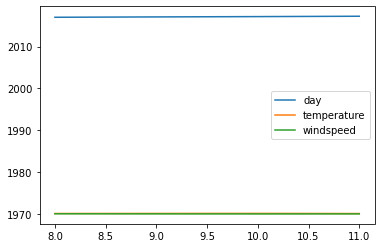

In [82]:

g.get_group("paris").plot()


### Group data using custom function: Let's say you want to group your data using custom function. Here the requirement is to create three groups

   1) Days when temperature was between 80 and 90
   2) Days when it was between 50 and 60
   3) Days when it was anything else



In [83]:
def grouper(df, idx, col):
    if 80 <= df[col].loc[idx] <=90:
        return "80-90"
    elif 50 <= df[col].loc[idx] <=60:
        return "50-60"
    else:
        return "others"
g = df.groupby(lambda x : grouper(df, x, "temperature"))
g

In [84]:
for key, d in g:
    print("Group by Key : {}\n".format(key))
    print(d)

Group by Key : 50-60

          day   city  temperature  windspeed   event
9  2017-02-01  paris           50         13  Cloudy
10 2017-03-01  paris           54          8  Cloudy
Group by Key : 80-90

         day    city  temperature  windspeed  event
4 2017-01-01  mumbai           90          5  Sunny
5 2017-02-01  mumbai           85         12    Fog
6 2017-03-01  mumbai           87         15    Fog
Group by Key : others

          day      city  temperature  windspeed   event
0  2017-01-01  new york           32          6    Rain
1  2017-02-01  new york           36          7   Sunny
2  2017-03-01  new york           28         12    Snow
3  2017-04-01  new york           33          7   Sunny
7  2017-04-01    mumbai           92          5    Rain
8  2017-01-01     paris           45         20   Sunny
11 2017-04-01     paris           42         10  Cloudy


### Pandas Concatenate Tutorial


In [147]:
import pandas as pd
india_weather = pd.DataFrame({"city" : ["mumbai","delhi","banglore"],
                             "temperature": [32,45,30],
                             "humidity":[80,60,78]})
india_weather

,city,temperature,humidity
0,mumbai,32,80
1,delhi,45,60
2,banglore,30,78


In [148]:
us_weather = pd.DataFrame({"city": ["new york","chicago","orlando"],
                          "temperature":[21,14,35],
                          "humidity" : [68,65,75]})
us_weather

,city,temperature,humidity
0,new york,21,68
1,chicago,14,65
2,orlando,35,75


In [149]:
df = pd.concat([india_weather, us_weather], ignore_index = True)
df

,city,temperature,humidity
0,mumbai,32,80
1,delhi,45,60
2,banglore,30,78
3,new york,21,68
4,chicago,14,65
5,orlando,35,75


In [150]:
df = pd.concat([india_weather, us_weather], keys =["india","us"])
df

city  temperature  humidity
india 0    mumbai           32        80
      1     delhi           45        60
      2  banglore           30        78
us    0  new york           21        68
      1   chicago           14        65
      2   orlando           35        75

In [151]:
df.loc["us"]

,city,temperature,humidity
0,new york,21,68
1,chicago,14,65
2,orlando,35,75


In [152]:
df.loc["india"]

,city,temperature,humidity
0,mumbai,32,80
1,delhi,45,60
2,banglore,30,78


### Concatenation Using Index

In [153]:
temperature_df = pd.DataFrame({"city":["mumbai","delhi","banglore"],
                              "temperature":[32,45,30],
                              }, index = [0,1,2])
temperature_df

,city,temperature
0,mumbai,32
1,delhi,45
2,banglore,30


In [154]:
windspeed_df = pd.DataFrame({"city": ["delhi","mumbai"],
                            "windspeed": [7,12]},index=[0,1])
windspeed_df

,city,windspeed
0,delhi,7
1,mumbai,12


In [161]:
print(df)
df_new = pd.concat([temperature_df, windspeed_df], axis=1) 
print("\n","\n",df_new)

             city  temperature  humidity
india 0    mumbai           32        80
      1     delhi           45        60
      2  banglore           30        78
us    0  new york           21        68
      1   chicago           14        65
      2   orlando           35        75

 
        city  temperature    city  windspeed
0    mumbai           32   delhi        7.0
1     delhi           45  mumbai       12.0
2  banglore           30     NaN        NaN


### Concatenate dataframe with series


In [162]:
s = pd.Series(["Humid","Dry","Rain"], name ="event")
s

0    Humid
1      Dry
2     Rain
Name: event, dtype: object

In [163]:
df_new = pd.concat([temperature_df,s],axis=1)
df_new

,city,temperature,event
0,mumbai,32,Humid
1,delhi,45,Dry
2,banglore,30,Rain


In [164]:
df

city  temperature  humidity
india 0    mumbai           32        80
      1     delhi           45        60
      2  banglore           30        78
us    0  new york           21        68
      1   chicago           14        65
      2   orlando           35        75

In [167]:
df_new2 = pd.concat([temperature_df, windspeed_df,s], axis=1) 
df_new2

,city,temperature,city,windspeed,event
0,mumbai,32,delhi,7.0,Humid
1,delhi,45,mumbai,12.0,Dry
2,banglore,30,NaN,NaN,Rain
